# IMPORT LIBRARIES

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("placementdata.csv")

In [3]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [5]:
df.isna().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [12]:
df = df.drop(columns=["StudentID"])

In [13]:
df.duplicated().sum()

72

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [15]:
df.shape

(10000, 11)

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(9928, 11)

In [22]:
df.columns

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities',
       'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [23]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000
mean,7.693946,1.042808,2.019944,1.006849,79.376209,4.320679,69.093372,74.425766
std,0.639961,0.663699,0.867118,0.903612,8.140884,0.411211,10.428709,8.901786
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [25]:
le = LabelEncoder()
for col in ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


In [28]:
corr = df.corr()

<Axes: >

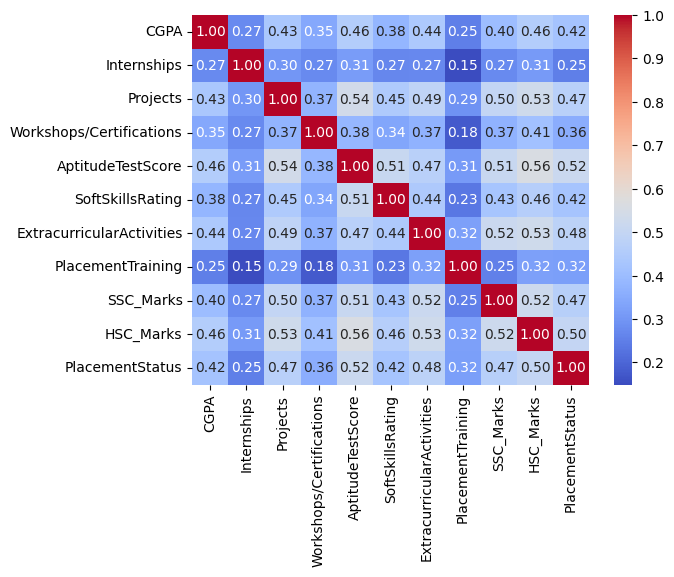

In [30]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

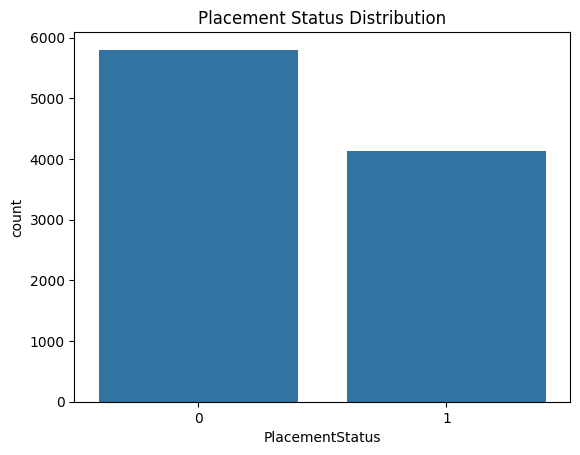

In [36]:
sns.countplot(x='PlacementStatus', data=df)
plt.title('Placement Status Distribution')
plt.show()

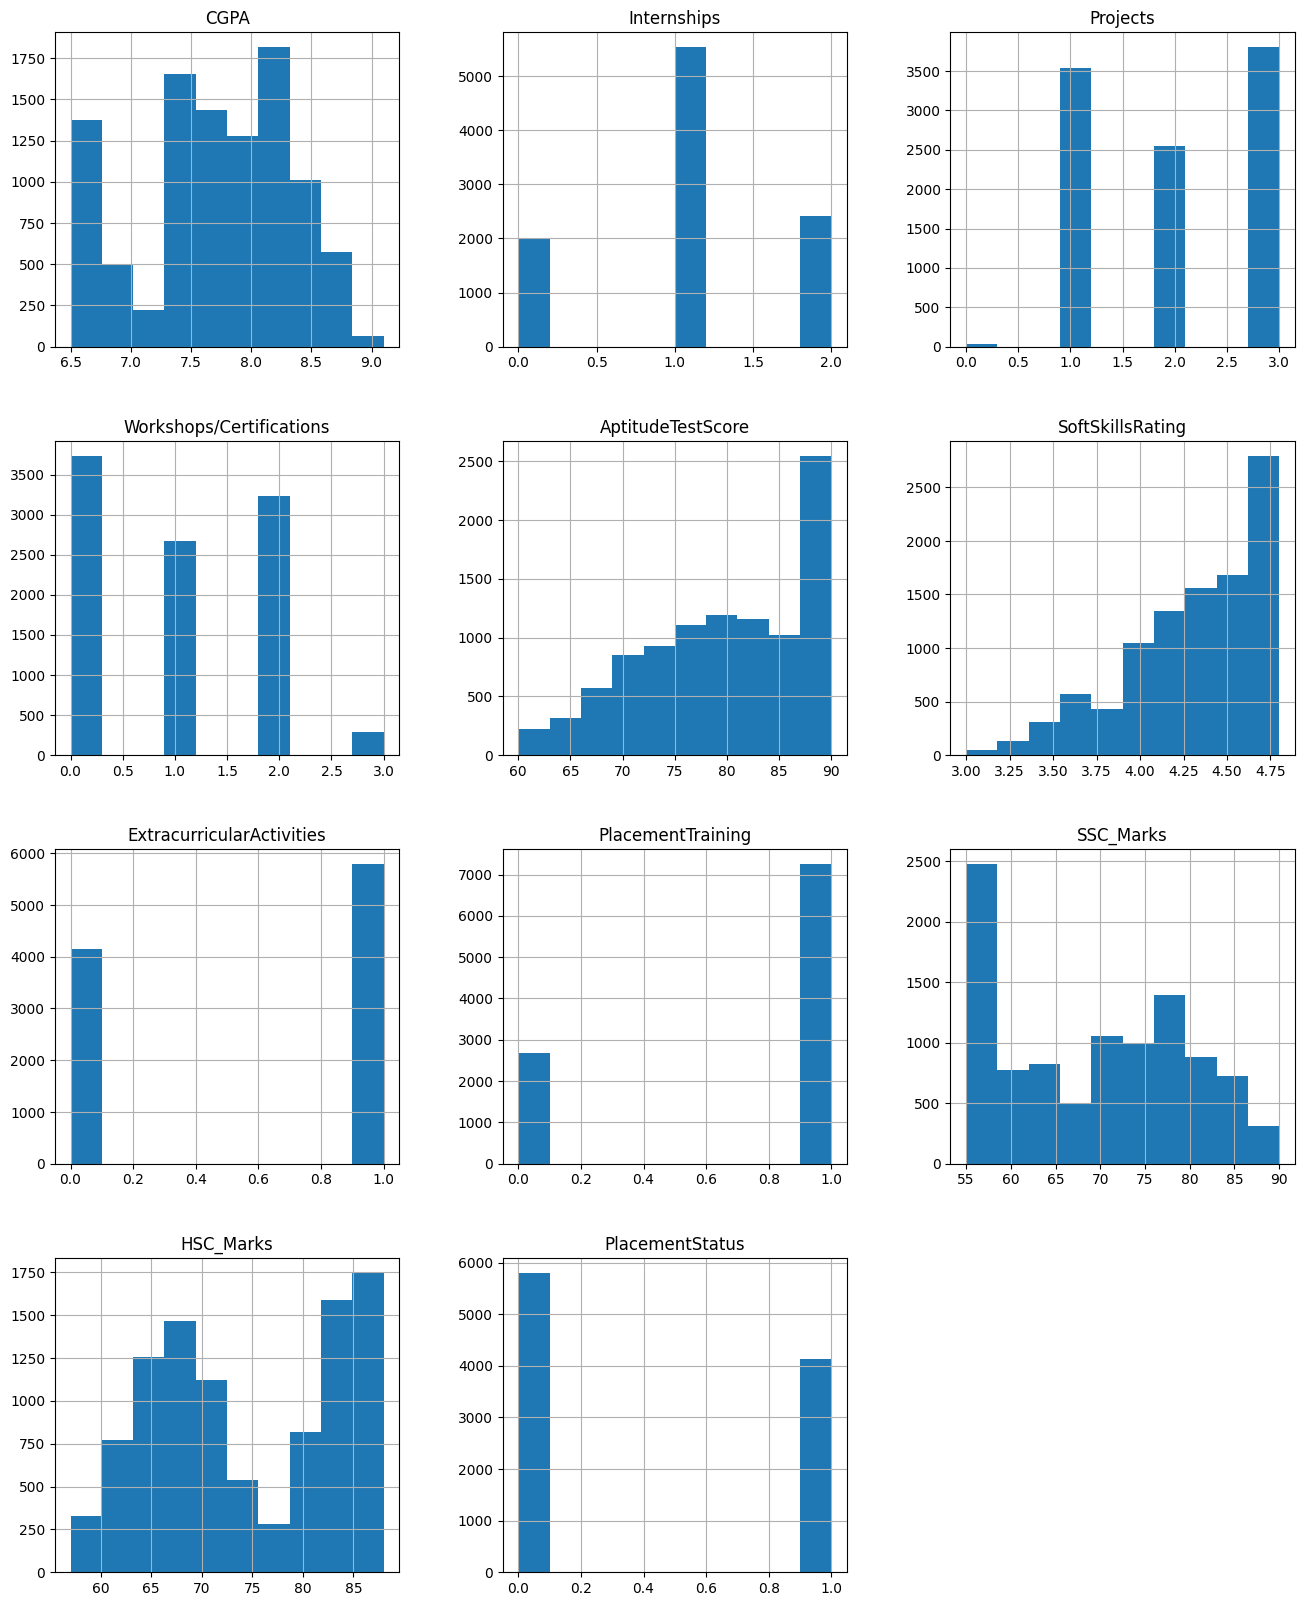

In [51]:
df.hist(figsize=(16,20));

In [37]:
x = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 ,random_state = 42)

In [46]:
y_test.value_counts()

PlacementStatus
0    1188
1     798
Name: count, dtype: int64

In [40]:
print(x.shape , x_train.shape , x_test.shape)

(9928, 10) (7942, 10) (1986, 10)


In [50]:
LR_model=make_pipeline(
    MinMaxScaler(),
    LogisticRegression(max_iter=1000)
)
LR_model.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [52]:
y_training_pred=LR_model.predict(x_train)
y_testing_pred=LR_model.predict(x_test)
print("Training acuuracy",accuracy_score(y_train,y_training_pred))
print("Testing acuuracy",accuracy_score(y_test,y_testing_pred))

Training acuuracy 0.7975321077814153
Testing acuuracy 0.8026183282980867


In [55]:
print(classification_report(y_test,y_testing_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1188
           1       0.74      0.79      0.76       798

    accuracy                           0.80      1986
   macro avg       0.79      0.80      0.80      1986
weighted avg       0.81      0.80      0.80      1986



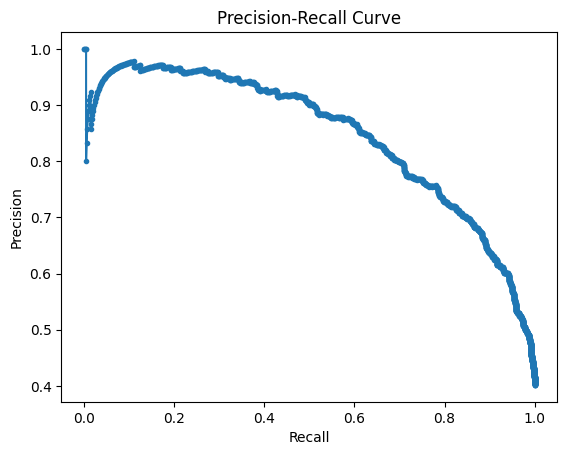

In [61]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


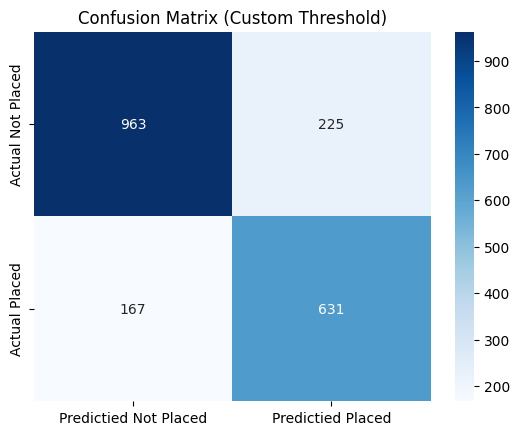

In [78]:
cm = confusion_matrix(y_test, y_testing_pred)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predictied Not Placed', 'Predictied Placed'], yticklabels=['Actual Not Placed', 'Actual Placed'],fmt="d")
plt.title('Confusion Matrix (Custom Threshold)')
plt.show()

In [69]:
y_probs = LR_model.predict_proba(x_test)[:, 1]

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

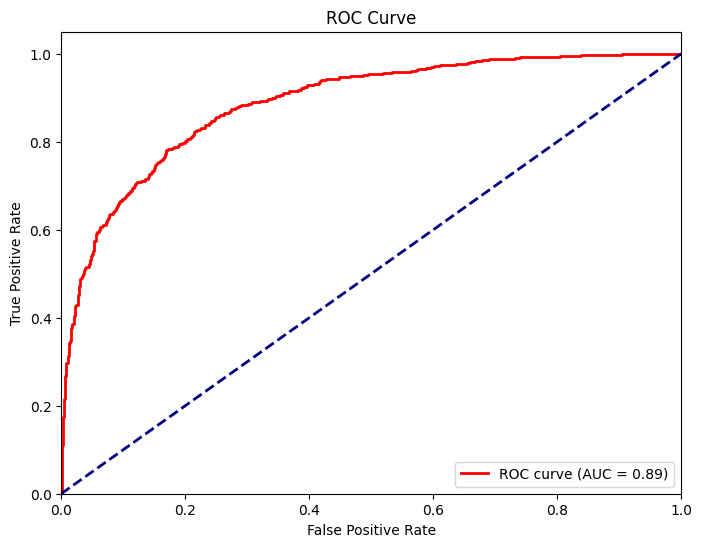

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [73]:
j_scores = tpr - fpr

best_threshold_index = j_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold (Maximizing Youden's J): {best_threshold}")

Best Threshold (Maximizing Youden's J): 0.5283614424406157


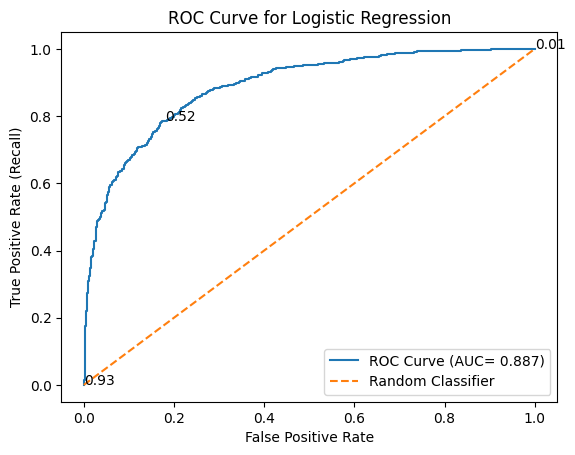

In [76]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_probs)
auc=roc_auc_score(y_test,y_probs)
plt.plot(fpr,tpr,label=f"ROC Curve (AUC= {round(auc,3)})")
plt.plot([0,1],[0,1],linestyle="--",label="Random Classifier")

threshold_idx=[1,len(thresholds)//2,-1] # strart ,middle,end
for idx in  threshold_idx:
  plt.annotate(f"{round(thresholds[idx],2)}",(fpr[idx],tpr[idx]))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1188
           1       0.76      0.78      0.77       798

    accuracy                           0.81      1986
   macro avg       0.80      0.81      0.80      1986
weighted avg       0.81      0.81      0.81      1986

Confusion Matrix:


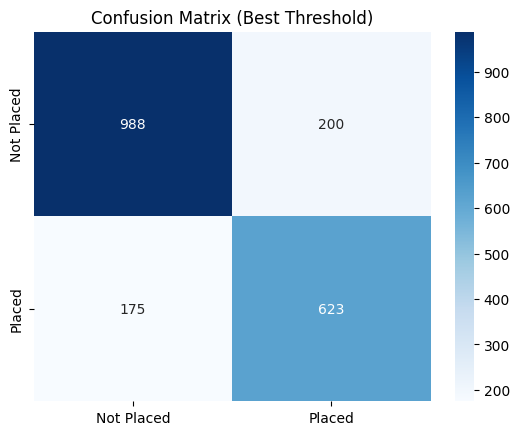

In [77]:
y_pred_best = (y_probs >= best_threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix (Best Threshold)')
plt.show()

In [79]:
import pickle
pickle.dump(LR_model,open("model_LogisticRegression.pkl","wb"))